<a href="https://colab.research.google.com/github/Machariajane/Dphi-ML-Bootcamp/blob/main/DatathonLogisticRegression1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings("ignore")

import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline

In [ ]:
tax_data  = pd.read_csv("https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/train_set_label.csv" )

In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
tax_data.isnull().sum()

Unnamed: 0        0
HHI               0
HHDL              0
Married           0
CollegGrads       0
AHHAge            0
Cars              0
Filed in 2017     0
Filed in 2016     0
Filed in 2015     0
PoliticalParty    0
dtype: int64

In [ ]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
tax_data[tax_data['Cars'].isnull()]

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty


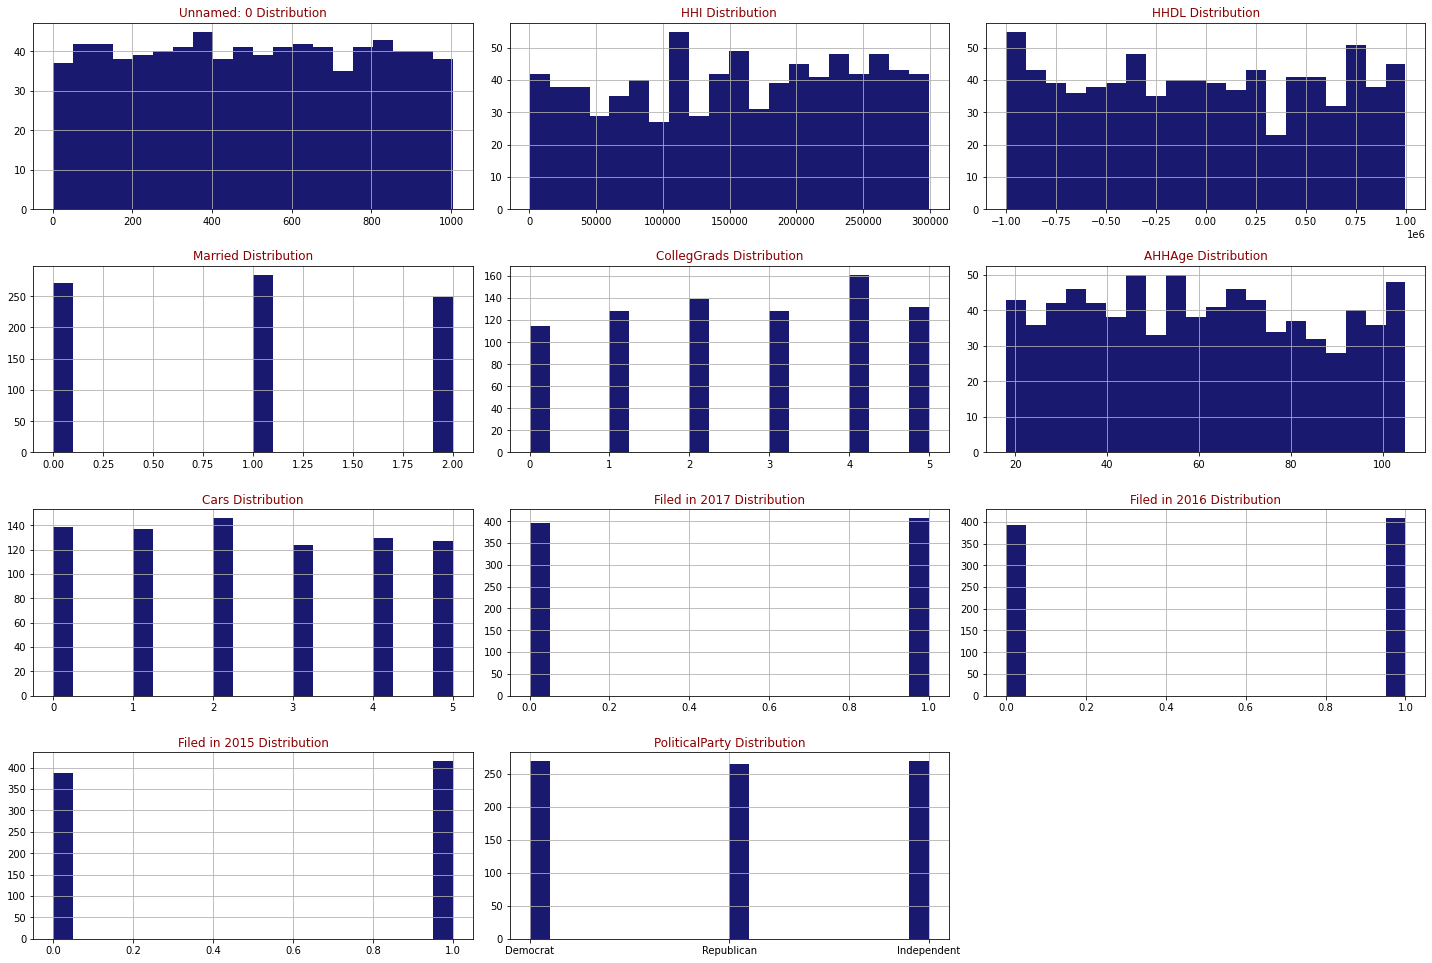

In [ ]:


def draw_histograms(dataframe, features, rows, cols):
    fig=plt.figure(figsize=(20,20))
    for i, feature in enumerate(features):
        ax=fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax,facecolor='midnightblue')
        ax.set_title(feature+" Distribution",color='DarkRed')
        
    fig.tight_layout()  
    plt.show()
draw_histograms(tax_data,tax_data.columns,6,3)

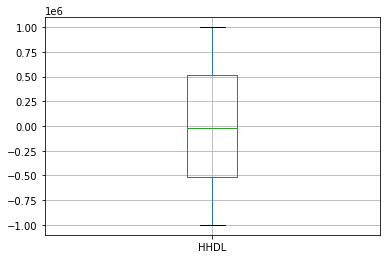

In [ ]:
# box plot.
tax_data.boxplot(column=['HHDL'])

In [ ]:
tax_data['HHI'].describe()

count       803.000000
mean     155402.688667
std       86788.153213
min         185.000000
25%       82373.000000
50%      156542.000000
75%      230772.000000
max      299374.000000
Name: HHI, dtype: float64

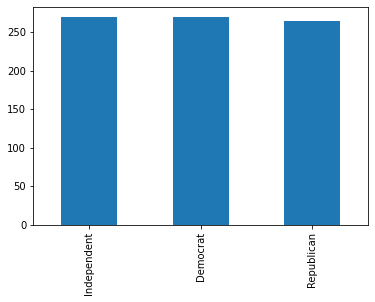

In [ ]:
# bar chart -  distribution of a categorical variable
tax_data['PoliticalParty'].value_counts().plot.bar()

In [ ]:
tax_data.dtypes

Unnamed: 0         int64
HHI                int64
HHDL               int64
Married            int64
CollegGrads        int64
AHHAge             int64
Cars               int64
Filed in 2017      int64
Filed in 2016      int64
Filed in 2015      int64
PoliticalParty    object
dtype: object

In [ ]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
tax_data=tax_data.drop_duplicates()

In [ ]:
tax_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 803 entries, 0 to 802
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      803 non-null    int64 
 1   HHI             803 non-null    int64 
 2   HHDL            803 non-null    int64 
 3   Married         803 non-null    int64 
 4   CollegGrads     803 non-null    int64 
 5   AHHAge          803 non-null    int64 
 6   Cars            803 non-null    int64 
 7   Filed in 2017   803 non-null    int64 
 8   Filed in 2016   803 non-null    int64 
 9   Filed in 2015   803 non-null    int64 
 10  PoliticalParty  803 non-null    object
dtypes: int64(10), object(1)
memory usage: 69.1+ KB


In [ ]:
sns.boxplot(x=tax_data['Married'])

In [ ]:
tax_data['PoliticalParty'].value_counts()

Independent    269
Democrat       269
Republican     265
Name: PoliticalParty, dtype: int64

In [ ]:
tax_data.head()


,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
le = preprocessing.LabelEncoder()
le.fit(tax_data['PoliticalParty'])
LabelEncoder()
list(le.classes_)
le.transform(tax_data['PoliticalParty'])


array([0, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 0, 0,
       0, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 2, 2, 2, 1, 1, 1, 2,
       1, 2, 0, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 2, 0, 2,
       0, 1, 2, 1, 1, 1, 1, 1, 1, 0, 1, 2, 1, 0, 0, 1, 1, 2, 0, 0, 1, 1,
       2, 1, 1, 0, 0, 1, 2, 1, 2, 2, 0, 1, 2, 2, 0, 1, 2, 1, 0, 1, 1, 0,
       0, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 0, 2, 1, 2, 2, 0, 0, 0, 0, 1, 2,
       2, 0, 2, 1, 0, 2, 0, 1, 2, 1, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 2, 0,
       0, 1, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 2, 1, 0, 2, 2, 1, 2, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 2, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 2, 1, 0, 2,
       1, 0, 2, 2, 2, 0, 1, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 1, 2, 2, 2, 1, 2, 0, 1, 2, 0, 2, 0, 0, 0, 2, 2, 1, 0, 1, 1,
       0, 0, 2, 1, 0, 0, 1, 0, 1, 2, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 2, 2,
       1, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 2, 0, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       0, 1, 0, 2, 2, 1, 0, 0, 0, 0, 2, 1, 2, 0, 0,

In [ ]:
tax_data.head()

,Unnamed: 0,HHI,HHDL,Married,CollegGrads,AHHAge,Cars,Filed in 2017,Filed in 2016,Filed in 2015,PoliticalParty
0,61,183414,-12402,1,2,28,1,0,0,1,Democrat
1,501,129786,700251,2,5,63,3,0,0,0,Republican
2,658,268343,493411,2,4,44,1,1,0,1,Independent
3,703,290506,-433408,1,1,28,5,1,0,1,Republican
4,702,90108,907135,1,3,57,5,1,1,0,Democrat


In [ ]:
X = tax_data.drop('PoliticalParty', axis = 1) 


y =le.transform(tax_data['PoliticalParty'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [ ]:
model = LogisticRegression()

In [ ]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred)

0.33540372670807456

In [ ]:
test_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/tax_payers/test_set_label.csv')

In [ ]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Unnamed: 0     201 non-null    int64
 1   HHI            201 non-null    int64
 2   HHDL           201 non-null    int64
 3   Married        201 non-null    int64
 4   CollegGrads    201 non-null    int64
 5   AHHAge         201 non-null    int64
 6   Cars           201 non-null    int64
 7   Filed in 2017  201 non-null    int64
 8   Filed in 2016  201 non-null    int64
 9   Filed in 2015  201 non-null    int64
dtypes: int64(10)
memory usage: 15.8 KB


In [ ]:
predictions = model.predict(test_data)


In [ ]:

# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(le.inverse_transform(predictions)) #preditcions are nothing but the final predictions of your model on input features of your new unseen test data
res.index = test_data.index # its important for comparison. Here "test_new" is your new test dataset
res.columns = ["prediction"]
# To download the csv file locally
from google.colab import files
res.to_csv('prediction_results.csv',index=False)         
files.download('prediction_results.csv')
# 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>